# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed. This homework is primarily about having fun with interpolation. If any question is unclear, or there are any typos, let us know!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import roots_chebyt, roots_legendre
from scipy.integrate import newton_cotes

## Problem 0 (35 points)
In this problem you will play around with interpolation using different choices of nodes.

### Part A (10 points)
Create a class that wraps `BarycentricInterpolator` to help you interpolate a function `f` on the interval `I=[a,b]` using a degree`n-1` polnynomial passing through `n` nodes. Your class should allow the user to choose between Chebyshev, Legendre, or equi-spaced nodes, but it should default to Chebyshev. 

You can get the Chebyshev nodes on the interval $[-1,1]$ using `scipy.special.roots_chebyt` and you can get the Gauss-Legendre nodes on the interval $[-1,1]$ using `scipy.special.roots_legendre`. Be sure to shift these nodes to the interval $I$.

Your class should have three methods:
* `__init__` which creates the interpolation nodes, evaluates the function at those nodes, and initializes a BarycentricInterpolator
* `__call__` which evaluate the inerpolant a specified `x` using the `BarycentricInterpolator`
* `__string__` which returns a handy description, which will eventually go into a legend

To keep things neat, put your class in the module `interpolators.py`

*Your answer here.  You can create some code cells as well*

In [2]:
from interpolators import WrapperBaryCentricInterpolator
f = lambda x : x ** 3
interpolation = WrapperBaryCentricInterpolator(f, [0, 3], 4, 'Chebyshev')
print(interpolation(2))
print(interpolation.__str__())

8.0
The Chebyshev interpolation with 4 nodes on internal [0, 3]


### Part B (5 points)
Create a class that wraps `interp1d` to create a linear spline (piecewise linear interpolant) of a function at equally spaced points. It should have the same methods as the class from part a.

In [3]:
from interpolators import WrapperInterp1d
f = lambda x : x ** 3
interpolation = WrapperInterp1d(f, [0, 3], 4)
print(interpolation(2))
print(str(interpolation))

8.0
The linear interpolant with 4 equi-spaced nodes on interval [0, 3]


### Part C (5 points)
Make a helper function `plot_data` in `interpolators.py` which easily plots data for you, with the calling sequence
`plot_data(dats, legs, xlab, ylab)` where `dats` is a list of arrays to be plotted, `legs` is a list of the corresponding legend entries, and `xlab` and `ylab` are axis labels.

For full marks, this plot should have all the elements discussed in class (different marker or line styles, thick lines, sensible font size, legend, etc...).

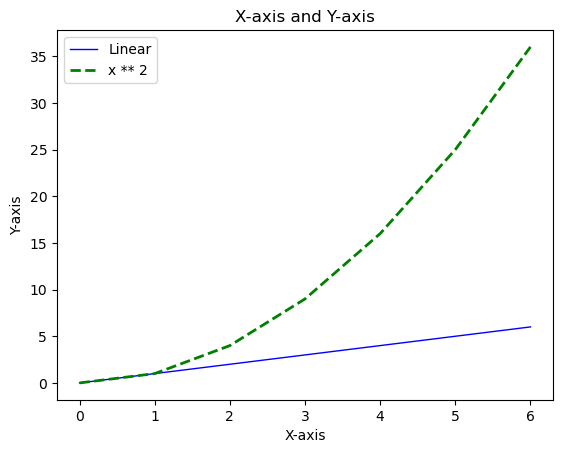

In [1]:
import matplotlib.pyplot as plt
def plot_data(dats, legs, xlab, ylab):
    if len(dats) != len(legs):
        raise ValueError("dats with len {}, leg with len {}, not match".format(len(dats), len(legs)))
        
    styles = ['-', '--', '-.', ':']
    colors = ['b','g','r','c','m','y','k','w']
    
    for i, data in enumerate(dats):
        plt.plot(data, linestyle = styles[i % len(styles)], \
             linewidth = i % 5 + 1, color = colors[i % len(colors)], label = legs[i])
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title("{} and {}".format(xlab, ylab))
    plt.show()


dats = [range(7), [i ** 2 for i in range(7)]]
legs = ["Linear", "x ** 2"]
plot_data(dats, legs, "X-axis", "Y-axis")

### Part D (10 points)
In this question, you will use the classes from the pervious questions to interpolate the function $f(x)=\frac{1}{1+25x^2}$ on the interval $I=[-1,1]$. Make a plot of the error generated when using all the methods to evaluate $f(1/e)$ for $n=2,3,\ldots, 50$. Which of the **four** interpolation strategies performed best?

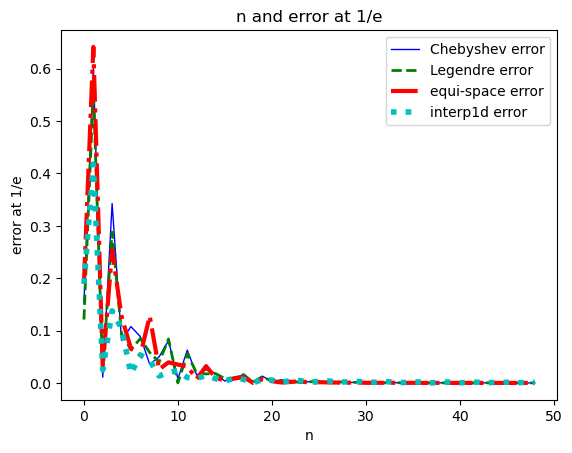

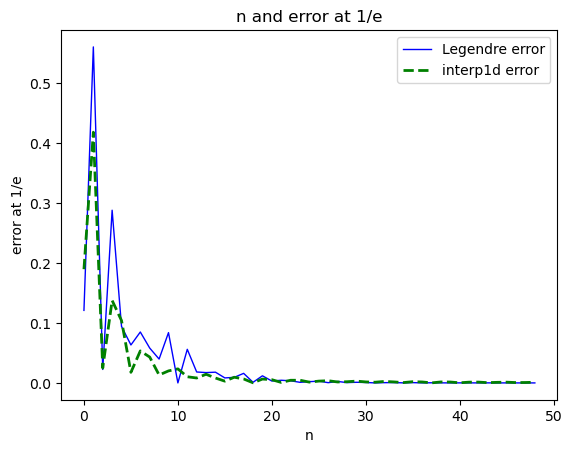

In [11]:
import numpy as np
from interpolators import WrapperBaryCentricInterpolator
from interpolators import WrapperInterp1d
f = lambda x : 1 / (1 + 25 * x ** 2)
error1, error2, error3, error4 = [], [], [], []
    
x = 1 / np.e
for n in range(2, 51):
    fun1 = WrapperBaryCentricInterpolator(f, [-1, 1], n, 'Chebyshev')
    fun2 = WrapperBaryCentricInterpolator(f, [-1, 1], n, 'Legendre')
    fun3 = WrapperBaryCentricInterpolator(f, [-1, 1], n, 'equi-space')
    fun4 = WrapperInterp1d(f, [-1, 1], n)
    val1 = fun1(x)
    val2 = fun2(x)
    val3 = fun3(x)
    val4 = fun4(x)
    y_expect = f(x)
    error1.append(abs(val1 - y_expect))
    error2.append(abs(val2 - y_expect))
    error3.append(abs(val3 - y_expect))
    error4.append(abs(val4 - y_expect))
    
errors = [error1, error2, error3, error4]
labels = ['Chebyshev error', 'Legendre error', 'equi-space error', 'interp1d error']
plot_data(errors, labels, 'n', 'error at 1/e')

errors = [error2, error4]
labels = ['Legendre error', 'interp1d error']
plot_data(errors, labels, 'n', 'error at 1/e')





In [7]:
Interp1d error performed best, since it has the least error.
In this interval, the behavior of the fuction is not too complicated. Without creating oscillations,
linear interpolation captures the trend of the function. It overcomes problems such as 
higher-degree polynomial interpolations affected by phenomena of Runge. As mentioned, 
it functions best with points that are equally spaced. It is simple and effective in terms of calculation.

### Part E (5 points)
Repeat part D using the function $f(x)=\exp(x)$ on $I=[0,1]$. Do you notice anything different?

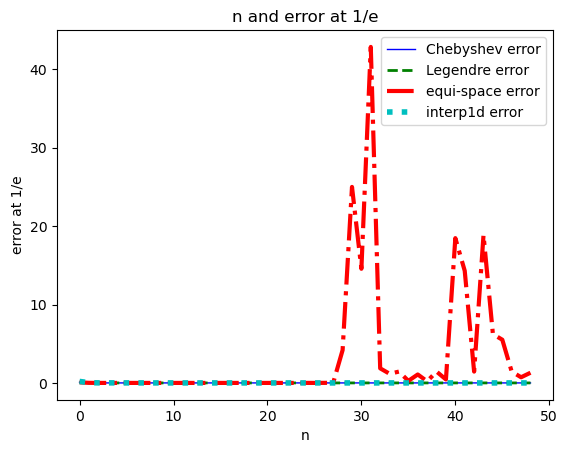

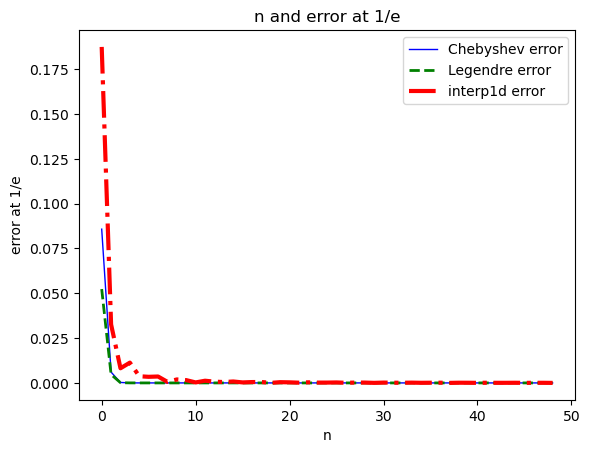

In [15]:
from interpolators import WrapperBaryCentricInterpolator
from interpolators import WrapperInterp1d
import numpy as np

f = lambda x : np.exp(x)
error1, error2, error3, error4 = [], [], [], []
    
x = 1 / np.e
for n in range(2, 51):
    fun1 = WrapperBaryCentricInterpolator(f, [0, 1], n, 'Chebyshev')
    fun2 = WrapperBaryCentricInterpolator(f, [0, 1], n, 'Legendre')
    fun3 = WrapperBaryCentricInterpolator(f, [0, 1], n, 'equi-space')
    fun4 = WrapperInterp1d(f, [0, 1], n)
    val1 = fun1(x)
    val2 = fun2(x)
    val3 = fun3(x)
    val4 = fun4(x)
    y_expect = f(x)
    error1.append(abs(val1 - y_expect))
    error2.append(abs(val2 - y_expect))
    error3.append(abs(val3 - y_expect))
    error4.append(abs(val4 - y_expect))

errors = [error1, error2, error3, error4]
labels = ['Chebyshev error', 'Legendre error', 'equi-space error', 'interp1d error']
plot_data(errors, labels, 'n', 'error at 1/e')

errors = [error1, error2, error4]
labels = ['Chebyshev error', 'Legendre error',  'interp1d error']
plot_data(errors, labels, 'n', 'error at 1/e')

In [ ]:
This time, Legendre error performed best, since it has the least error.
Its orthogonal character ensures that smooth functions are interpolated accurately. 
It efficiently captures the properties of fuction by using polynomial roots as nodes. 
This method eliminates large approximation oscillations. As the polynomial degree increases, 
the approach becomes increasingly accurate. Exp(x) is an excellent choice for Legendre-based 
interpolation.

## Problem 1 (20 points)
Modify your previous classes to integrate the function `f` over the interval `I`. To do this, you should modify the `__init__` routine to generate quadrature weights such that $\int_a^bf(x)dx\approx \sum_i f(x_i) w_i$. You should also add a method `quad` that computes the sum, approximating the integral. 

The provided command for Legendre points already provides the required weights. To get the weights for the higher order interpolant through equispaced points, you can use `scipy.integrate.newton_cotes` (be aware of the default interval and number of points assumed by this function). The weights for the piecewise linear method are given in the course notes (see the Trapezoid rule). Be sure to rescale your weights so that the integral is computed over the interval $I=[a,b]$.

**NOTE:** There isn't a simple Python function to get the weights using Chebyshev nodes, so for this homework, we will skip it. For those interested, the quadrature method based on Chebyshev nodes is called "Clenshaw-Curtis quadrature". In case you missed it, **don't bother trying to get the quadrature weights for Chebyshev nodes**.

Test the accuracy of all three of your quadrature methods on the integral $\int^0_{-2} \frac{1}{1+25(x+1)^2} dx$ with $n=2,3,\ldots, 50$. Which of your **three** methods performed best?

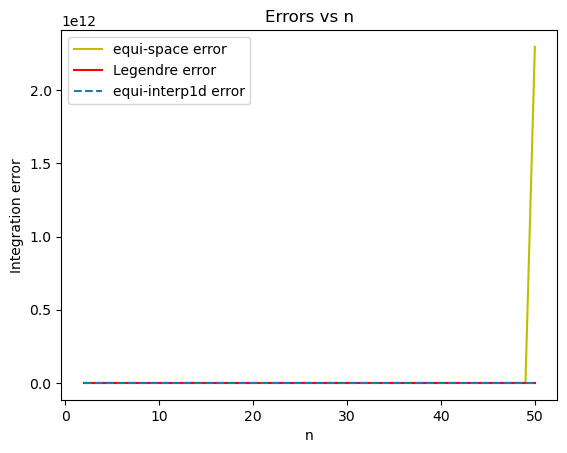

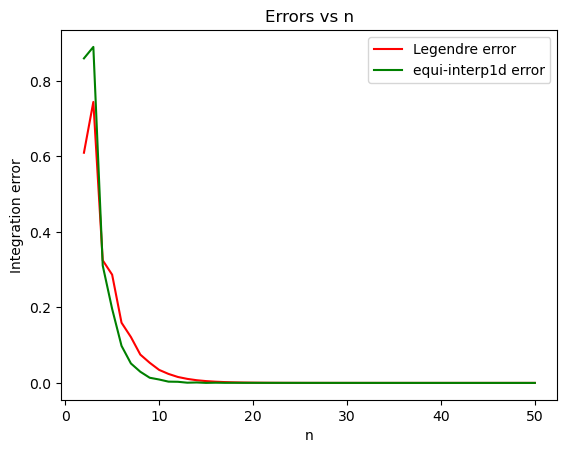

In [10]:
from interpolators import ReviseBaryCentricInterpolator
from interpolators import ReviseInterp1d
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
f = lambda x : 1 / (1 + 25 * (x + 1) ** 2)
error1, error2, error3 = [], [], []
for n in range(2, 51):
    fun1 = ReviseBaryCentricInterpolator(f, [-2, 0], n, "equi-space")
    fun2 = ReviseBaryCentricInterpolator(f, [-2, 0], n, "Legendre")
    fun3 = ReviseInterp1d(f, [-2, 0], n)
    expect = sp.integrate.quad(f, -2, 0)[0]
    error1.append(abs(fun1.quad() - expect) / expect)
    error2.append(abs(fun2.quad() - expect) / expect)
    error3.append(abs(fun3.quad() - expect) / expect)
plt.plot(range(2, 51), error1, label = 'equi-space error', color = 'y')
plt.plot(range(2, 51), error2, label = 'Legendre error', color = 'r')
plt.plot(range(2, 51), error3, '--', label = 'equi-interp1d error')
plt.xlabel('n')
plt.ylabel('Integration error')
plt.legend()
plt.title('Errors vs n')
plt.show()

plt.plot(range(2, 51), error2, label = 'Legendre error', color = 'r')
plt.plot(range(2, 51), error3, label = 'equi-interp1d error', color = 'g')
plt.xlabel('n')
plt.ylabel('Integration error')
plt.legend()
plt.title('Errors vs n')
plt.show()


In [ ]:
The equi-interp1d error performed best, since it has the least error.
The function is smooth without rapid changes and the behavior of the function remains 
consistent during the interval. Boundaries of the interval are significant. It results 
in less oscillatory errors.

## Problem 2 (20 points)
In this problem we will explore the simplest method for getting quadrature weights. For simplicity, we shall assume that we are working on the interval $[-1,1]$.

Since quadrature rules are designed to integrate the polynomials of degree $n$ exactly, we can get the quadrature weights by ensure that this is so. If we have already chosen the nodes $x_0,\ldots, x_n$, the we simply need to verify that
\begin{align*}
2&=\int_{-1}^1 1 dx = w_0 1+\cdots w_n 1\\
0&=\int_{-1}^1 x dx = w_0 x_0+\cdots w_n x_n\\
\frac{2}3&=\int_{-1}^1 x^2 dx = w_0 x_0^2+\cdots w_n x_n^2\\
\vdots \\
\frac{1-(-1)^n}{n+1}&=\int_{-1}^1 x^n dx = w_0 x_0^n+\cdots w_n x_n^n
\end{align*}
Write a function which solves the above linear system for a provided set of nodes. The function `numpy.vander` will help you to generate the system matrix.

You should test this function by finding the weights for computing an integral using 30 Gauss-Legendre nodes and comparing those weights to the weights provided by `scipy.special.roots_legendre`.

Once you have tested your function, use it to find the Newton-Cotes weights using 30 nodes. How close are your weights to those provided by `scipy.integrate.newton_cotes`?


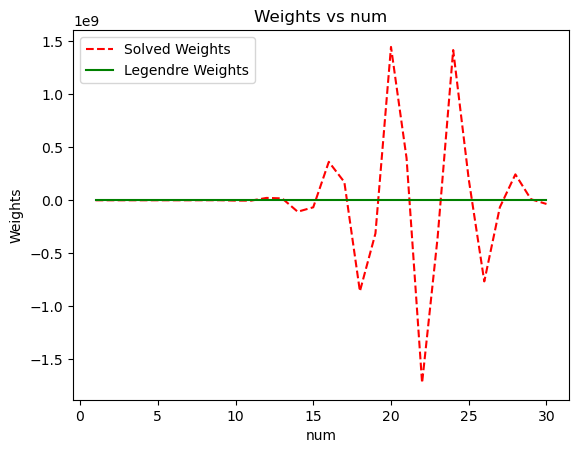

Norm difference between solved weights and Legendre weights: 3011030086.9483113


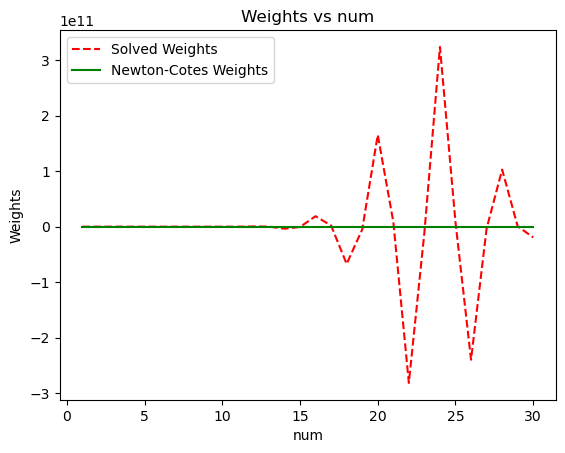

Norm difference between solved weights and Newton-Cotes: 533804279694.9216


In [9]:
from scipy.special import roots_chebyt, roots_legendre
from scipy.integrate import newton_cotes
import numpy as np
import matplotlib.pyplot as plt

def solves(nodes):
    matrix = np.vander(nodes, increasing = True)
    b = [(1 - (-1) ** (i+1)) / (i + 1) for i in range(len(nodes))]  
    w = np.linalg.solve(matrix, b)
    return w

nodes, w_ans = roots_legendre(30)
weights = solves(nodes)
norm_legendre = np.linalg.norm(weights - w_ans)
plt.plot(np.linspace(1, len(weights), len(weights)), weights, '--', label = "Solved Weights", color = 'r')
plt.plot(np.linspace(1, len(w_ans), len(w_ans)), w_ans, label = "Legendre Weights", color = 'g' )
plt.xlabel('num')
plt.ylabel('Weights')
plt.legend()
plt.title('Weights vs num')
plt.show()
print('Norm difference between solved weights and Legendre weights:', norm_legendre)

weights = solves(np.linspace(-1, 1, 30))
w_ans, _ = newton_cotes(29)
norm_nc = np.linalg.norm(weights - w_ans)
plt.plot(np.linspace(1, len(weights), len(weights)), weights, '--', label = "Solved Weights", color = 'r')
plt.plot(np.linspace(1, len(w_ans), len(w_ans)), w_ans, label = "Newton-Cotes Weights", color = 'g')
plt.xlabel('num')
plt.ylabel('Weights')
plt.legend()
plt.title('Weights vs num')
plt.show()
print('Norm difference between solved weights and Newton-Cotes:', norm_nc)


In [ ]:
When n is less than around 13, the solved weights is approximately the same 
as the Legendre Weights, they are really close. When n is bigger than around 13, 
they became not close to each other.
When n is less than around 15, the solved weights is approximately the same 
as the Legendre Weights, they are really close. When n is bigger than around 15, 
they became not close to each other.
Due to oscillatory polynomial behavior and inadequate node spacing, 
scipy.integrate.newton_cotes can produce significant errors when using numerous nodes; 
hence, adaptive or Gaussian quadrature are more dependable alternatives for integration.

## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.

In [ ]:
At least seven hours.